 <img src="isitcom.png" width="120" align="left"> <img src="inv.png" width="120" align="right"> 

<h1><center><span style="color:blue">Projet
:Fouille de Données</span></center></h1>
<h1><center><span style="color:blue">Thème: Classification des Tweets </span></center></h1>

<img src="classify.jpg" width="1000" align="center">

<h1><center><span style="color:red">Réalise par :Imen Ayari </span></center></h1>
<h1><center><span style="color:red">3DNIG1 </span></center></h1>
<h1><center><span style="color:red">2020-2021 </span></center></h1>



<h1>Objectifs :</h1>

<h4>•Maitriser l’API de twitter pour l’extraction des tweets </h4>
<h4>•Maitriser la partie NLP (natural language processing) avec NLTK en Python</h4>
<h4>•Appliquer les principes de nettoyage des données</h4>
<h4>•Classer les tweets:regrouper ensemble les tweets qui sont similaires.C’est une étape qui peut être considérée comme une étape</h4>


In [1]:
!pip install tweepy

<h3>chargé le bib de twitter</h3>

In [1]:
pip install DateTime

> A chaque fois en cahrgeant un tweet on lui applique certains modifications en
remplace la virgule par un espace, en met une virgule entre le temps et le tweet et en ajoute . à la fin de chaque ligne ,et s'il ya une exception elle doit étre s'afficher aprés 1s 

In [2]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time

apikey = 'E21lFKoQKu5ruySBvoFw4LGo7'
apisecret = 'htMTqYaBpa9RtzwjuW3s4emE5rycJMGtLCpCS2ZuVEbjFNQHln'
token = '1335011428496011265-PdwBKqyvHBsD1YM7cZsiU9nYGfRmF7'
tokensecret = 'wigsgRh70QXLoy6bSEP1vjLMWOsHARccSAnfYx7DQCh9i'


class listener(StreamListener):

    def on_data(self, data):
     
        try:
            Time=data.split('{"created_at":"')[1].split('","id')[0]
            text=data.split(',"text":"')[1].split('","source')[0]
            text = text.replace(",",'')
                
            save=open("facebook.csv","a")
            saving_text=Time+str(",")+text
            save.write(saving_text)
            save.write("\n")
            save.close()
            return True
        except Exception as e:
            print(str(e))
            time.sleep(1)
    
OAuth = OAuthHandler(apikey, apisecret)
OAuth.set_access_token(token, tokensecret)


Str= Stream(OAuth, listener())
Str.filter(track=["facebook"])
        

    

KeyboardInterrupt: 

In [8]:

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
Comlumns = ['Temps', 'text']

twitter = pd.read_csv("facebook.csv", header=None, names=Comlumns)
twitter.head(10)

,Temps,text
0,Mon Dec 14 17:14:54 +0000 2020,RT @Jim_Jordan: If Joe Biden had nothing to do...
1,Mon Dec 14 17:14:55 +0000 2020,RT @sbauerAP: BREAKING:\n\nWisconsin Supreme C...
2,Mon Dec 14 17:14:55 +0000 2020,RT @kylegriffin1: MADISON Wis. (AP) \u2014 Wis...
3,Mon Dec 14 17:14:55 +0000 2020,RT @Qtah17: BREAKING \ud83d\udea8\ud83d\udea8\...
4,Mon Dec 14 17:14:55 +0000 2020,RT @theMRC: .@SenRonJohnson calls out Joe Bide...
5,Mon Dec 14 17:14:55 +0000 2020,@CondreayDavid The number one complaint I have...
6,Mon Dec 14 17:14:55 +0000 2020,If there was anything there why didn\u2019t Bi...
7,Mon Dec 14 17:14:55 +0000 2020,RT @MajorPatriot: Today the electoral college ...
8,Mon Dec 14 17:14:55 +0000 2020,RT @Qtah17: BREAKING \ud83d\udea8\ud83d\udea8\...
9,Mon Dec 14 17:14:55 +0000 2020,RT @PollPolitics: NEW YORK: Former President B...


In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Temps   275 non-null    object
 1   text    275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


<h4>Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url, …</h4>

In [6]:
import re     # pour les clening
    
for i, column in twitter.iterrows():
    column = column['text']
    img= re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    

    column1 =re.sub(img, "", column)
    column2 = column1.replace("http://", "")
    column3 = column2.replace("RT", "")# a change le name
    column4 = column3.replace("hhh", "")
    column5 = column4.replace("@", "")
    column6 = column5.replace("[", "")
    column7 = column6.replace("]", "")
    column8 = column7.replace(",", "")
    column9 = column8.replace("&", "")
    column10 = column9.replace("\n", "")
    column11 = column10.replace("~", "")
    column12 = column11.replace("{", "")
    column13 = column12.replace("}", "")
    column14 = column13.replace("#", "")
    column15 = column14.replace("|", "")
    column16 = column15.replace("§", "")
    column17 = column16.replace("_", "")
    column18 = column17.replace("//", "")
    column19 = column18.replace("https://", "")
    column20 = column19.replace("""""", "")
    column21 = column20.replace("\\", "")
    
    
    twitter.loc[i,'text'] =column19

In [7]:
import csv
twitter.to_csv('facebook_cleand.csv',index = False)
twitter.head(10)

,Temps,text
0,Mon Dec 14 17:14:54 +0000 2020,JimJordan: If Joe Biden had nothing to do wit...
1,Mon Dec 14 17:14:55 +0000 2020,sbauerAP: BREAKING:\n\nWisconsin Supreme Cour...
2,Mon Dec 14 17:14:55 +0000 2020,kylegriffin1: MADISON Wis. (AP) \u2014 Wiscon...
3,Mon Dec 14 17:14:55 +0000 2020,Qtah17: BREAKING \ud83d\udea8\ud83d\udea8\ud8...
4,Mon Dec 14 17:14:55 +0000 2020,theMRC: .SenRonJohnson calls out Joe Biden fo...
5,Mon Dec 14 17:14:55 +0000 2020,CondreayDavid The number one complaint I have ...
6,Mon Dec 14 17:14:55 +0000 2020,If there was anything there why didn\u2019t Bi...
7,Mon Dec 14 17:14:55 +0000 2020,MajorPatriot: Today the electoral college mee...
8,Mon Dec 14 17:14:55 +0000 2020,Qtah17: BREAKING \ud83d\udea8\ud83d\udea8\ud8...
9,Mon Dec 14 17:14:55 +0000 2020,PollPolitics: NEW YORK: Former President Bill...


<h2><span style="color:red">2.Traitement des tweets : NLP (Natural LanguageProcessing)</span>
<h4>On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.</h4>

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<h3> analyse de mots</h3>

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import json
from collections import Counter

In [9]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h4>cette code faire les estimation de sentiment de gens</h4>

In [12]:
positif = 0
negative = 0
neutre = 0
for i in twitter.text:
    analyse = TextBlob(i)#textBlob nous affiche le sentiment
    analy = analyse.sentiment[1]
    if analy > 0.5:
        positif = positif +1
    elif analy < 0.5:
        negative = negative + 1
    else:
        neutre = neutre + 1
print("les sentiments Positives = ", positif)
print("les sentiments Negative = ", negative)
print("les sentiments Neutre = ", neutre)

les sentiments Positives =  79
les sentiments Negative =  160
les sentiments Neutre =  36



>nltk contenant le textblob qui traite les sentiments,besh nekhou tweet mta3i n7otha f variable analyse o n'appliqui 3leha fonction sentiment mta3 text blob besh ta3meli classification mta3 les sentiments si sentiment > 0.5 rahi positive

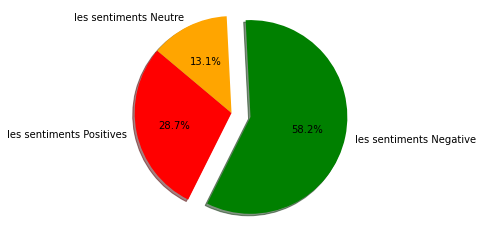

In [18]:
#Plotting sentiments
labels = 'les sentiments Positives', 'les sentiments Negative', 'les sentiments Neutre'
sizes = [positif, negative, neutre]
colors = ['red', 'green', 'orange']
explode = (0, 0.2, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [13]:
facebook_cleand = open('facebook_cleand.csv', 'r')
lines = facebook_cleand.readlines()
twitterText = ''
for i in lines:
    twitterText = twitterText + i

In [21]:
blob_object = TextBlob(twitterText, analyzer=NaiveBayesAnalyzer())
all_analyse = blob_object.sentiment
print("this is all sentiments:",all_analyse)

this is all sentiments: Sentiment(classification='pos', p_pos=1.0, p_neg=2.9040761526442996e-57)


In [22]:

def getwords(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens.split():
            yield token

all_repetitive_words = getwords(twitter.text)

>La fonction selected prend tous les mots de tweet et les classés sous forme de liste

In [24]:
from nltk import FreqDist
FreqDistpos = FreqDist(all_repetitive_words)
print(FreqDistpos.most_common(10))

[('Joe', 200), ('Biden', 175), ('the', 170), ('to', 148), ('a', 86), ('his', 73), ('in', 69), ('and', 67), ('for', 66), ('with', 62)]


>FreqDist cherche le nombre de répitition de chaque mots

In [30]:
RBS=NNP=CD=VB=JJ=JJS=VBN=other=0
for word, tag in pos_tag(word_tokenize(twitterText)):
    if tag == 'RBS':
        RBS +=1
    elif tag == 'VB':
        VB +=1
    elif tag =='CD':
        CD +=1       
    elif tag =='NNP':
        NNP +=1        
    elif tag =='JJ':
        JJ +=1
    elif tag=='VBD':
        VBD +=1
    elif tag=='JJS':
        JJS +=1  
    elif tag=='VBN':
        VBN +=1 
    else:
        other +=1

print("our File contains {0} noun, {1} proper noun, {2} adjective, {3} verb in past tense, {4} verb, {5} cardinal digit and {6} other characters".format(RBS,NNP,JJ,VBD,VB,CD,JJS,VBN,other))


our File contains 7 noun, 2388 proper noun, 638 adjective, 879 verb in past tense, 230 verb, 1162 cardinal digit and 11 other characters


In [9]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

>on classe les mots en anglais dans une liste

In [31]:
ps = PorterStemmer() 
Mydataset=[]
en_stops = set(stopwords.words('english'))
for i in word_tokenize(twitterText):
    if i not in en_stops:
        Mydataset.append(i)
        
print(Mydataset[0:])

['Temps', ',', 'text', 'Mon', 'Dec', '14', '17:14:54', '+0000', '2020', ',', 'JimJordan', ':', 'If', 'Joe', 'Biden', 'nothing', 'Hunter', 'Biden\\u2019s', 'business', 'dealings', 'Hunter', 'request', 'dad', 'key', 't\\u2026', 'Mon', 'Dec', '14', '17:14:55', '+0000', '2020', ',', 'sbauerAP', ':', 'BREAKING', ':', '\\n\\nWisconsin', 'Supreme', 'Court', 'rules', 'Trump\\u2019s', 'attempt', 'overturn', 'loss', 'Democrat', 'Joe', 'Biden', 'state', 'Mon', 'Dec', '14', '17:14:55', '+0000', '2020', ',', 'kylegriffin1', ':', 'MADISON', 'Wis.', '(', 'AP', ')', '\\u2014', 'Wisconsin', 'Supreme', 'Court', 'rules', 'Trump', "'s", 'attempt', 'overturn', 'loss', 'Democrat', 'Joe', 'Biden', 'in\\u2026', 'Mon', 'Dec', '14', '17:14:55', '+0000', '2020', ',', "''", 'Qtah17', ':', 'BREAKING', '\\ud83d\\udea8\\ud83d\\udea8\\ud83d\\udea8\\n\\nRudy', 'Giuliani', 'states', 'war', 'room', ':', '\\', "''", "''", 'Joe', 'Biden', 'never', 'President', 'could', 'never', 'get', 'security', 'clearance', 'he\\u2026',

>on donne à chaque mots un symbole (numéro) et le nombre de répitition de ce mot (symbole, répitition)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
result=CountVectorizer.fit_transform(Mydataset)
print(result)

  (0, 1715)	1
  (2, 1718)	1
  (3, 1271)	1
  (4, 694)	1
  (5, 124)	1
  (6, 124)	1
  (6, 177)	1
  (6, 321)	1
  (7, 1)	1
  (8, 205)	1
  (10, 1091)	1
  (12, 1038)	1
  (13, 1096)	1
  (14, 511)	1
  (15, 1340)	1
  (16, 1033)	1
  (17, 511)	1
  (17, 1828)	1
  (18, 544)	1
  (19, 689)	1
  (20, 1033)	1
  (21, 1544)	1
  (22, 668)	1
  (23, 1125)	1
  (24, 1838)	1
  :	:
  (27338, 869)	1
  (27339, 1075)	1
  (27341, 1029)	1
  (27343, 592)	1
  (27343, 2069)	1
  (27344, 1994)	1
  (27345, 2073)	1
  (27346, 1271)	1
  (27347, 694)	1
  (27348, 124)	1
  (27349, 177)	1
  (27349, 135)	1
  (27349, 209)	1
  (27350, 1)	1
  (27351, 205)	1
  (27353, 1577)	1
  (27355, 744)	1
  (27357, 1281)	1
  (27358, 557)	1
  (27359, 1096)	1
  (27360, 511)	1
  (27361, 544)	1
  (27362, 1410)	1
  (27363, 578)	1
  (27364, 604)	1


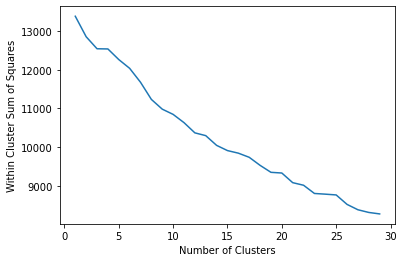

In [33]:
from sklearn.cluster import KMeans
WCSoS = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(result)
    WCSoS.append(kmeans.inertia_)
plt.plot(range(1,30), WCSoS)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

>on va compter le nombre de cluster

In [34]:
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [35]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\users\hp\anaconda3\lib\site-packages (2.3.5)


In [102]:
!pip install spacy[lookups]

  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807580 sha256=78de41ae92e9da544c9b9360c860ff59c246f3a10b5675b04b2b616305613b9d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\14\41\9b\5215f783f67bd1f98c76e8a2a95fdbfd7bf37fac0500af0987
Successfully built spacy-lookups-data


In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from string import punctuation

nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())#aya mots majuscle nrodha minuscule
    return " ".join(final_text)
twitter.text = twitter.text.apply(furnished)

In [40]:
economy_related_words = "agriculture infrastructure capitalism trading service sector technology  economical supply industrialism efficiency frugality retrenchment downsizing   credit debit value economize   save  economically economies sluggish rise   rising spending conserve trend low-management  decline   industry impact poor  profession    surplus   fall declining  accelerating interest sectors balance stability productivity increase rates pushing expanding stabilize  rate industrial borrowing strugglingdeficit predicted    increasing  data economizer analysts investment market-based economy   debt free enterprise medium  exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter distribution downturn economist"

In [41]:
sport_related_words ="aerobics archer archery arena arrow athlete athletics axel badminton ball base baseball basketball bat baton batter batting biathlon bicycle bicycling bike biking billiards bobsleigh bocce boomerang boules bowbowler bowling boxer boxing  bronze medalbunt karate kayak kayaker kayaking kickball kite kneepads kung fu paddle paddleball paddling paintball parasailing parkour pentathlon pickleball ping pong pitch pitcher play player playing playoffs pogostick polepolevault polopool puck " 

In [42]:
health_related_words="fitness healthiness heartiness robustness sap soundness verdure wellness wholeness wholesomeness fettle shape cleanliness hygienehardiness lustiness robustiousness ruggedness stamina strength toughness vigor vigorousness vitalitybloom flush flushness activeness agility liveliness spryness weal welfare well-being debility decrepitude feebleness frailness infirmity lameness sickliness weakness ailment condition disease disorder malady trouble practice pass phase stage footing picture posture scene situation status rank standing"

In [43]:
social_related_words=" boon clubbable clubby companionable convivial extroverted gregarious outgoing sociable Words Related to social cordial folksy forthcoming friendly hospitable affable genial graciousagreeable amiable congenial kindly neighborly animated jaunty jolly jovial lively peppy perky pert spirited sprightful sprightly vivacious communicative expansive garrulous talkative"



In [44]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
sport = furnished(sport_related_words)
health = furnished(health_related_words)

In [45]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy
#kol matl9a espace a3mel splite(ma3naha kol ma tal9a espace 5alaha wa7adha elkalma)

'agriculture infrastructure capitalism trading service sector technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economy sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest balance stability productivity increase rate pushing expanding stabilize industrial borrowing strugglingdeficit predicted increasing data economizer analyst investment market-based debt free enterprise medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism income contraction employment job upturn deflation macroeconomics bankruptcy exporter hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture mutual plan mortgage lender unemployment crunch central financial i

In [46]:
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social

'boon clubbable clubby companionable convivial extroverted gregarious outgoing sociable words related social cordial folksy forthcoming friendly hospitable affable genial graciousagreeable amiable congenial kindly neighborly animated jaunty jolly jovial lively peppy perky pert spirited sprightful sprightly vivacious communicative expansive garrulous talkative'

In [52]:
string1 = sport
words = string1.split()
sport = " ".join(sorted(set(words), key=words.index))
sport

'aerobics archer archery arena arrow athlete athletics axel badminton ball base baseball basketball bat baton batter batting biathlon bicycle bicycling bike biking billiards bobsleigh bocce boomerang boule bowbowler bowling boxer boxing bronze medalbunt karate kayak kayaker kayaking kickball kite kneepads kung fu paddle paddleball paddling paintball parasailing parkour pentathlon pickleball ping pong pitch pitcher play player playing playoff pogostick polepolevault polopool puck'

In [53]:
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'fitness healthiness heartiness robustness sap soundness verdure wellness wholeness wholesomeness fettle shape cleanliness hygienehardiness lustiness robustiousness ruggedness stamen strength toughness vigor vigorousness vitalitybloom flush flushness activeness agility liveliness spryness weal welfare well-being debility decrepitude feebleness frailness infirmity lameness sickliness weakness ailment condition disease disorder malady trouble practice pas phase stage footing picture posture scene situation status rank standing'

In [54]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

e_scores = get_scores(economy, twitter.text.to_list())
s_scores = get_scores(social, twitter.text.to_list())
sp_scores = get_scores(sport, twitter.text.to_list())
h_scores = get_scores(health, twitter.text.to_list())


In [55]:
print(e_scores)

[0.5714285714285714, 0.6176470588235294, 0.5897435897435898, 0.631578947368421, 0.5555555555555556, 0.6, 0.5588235294117647, 0.6285714285714286, 0.631578947368421, 0.7272727272727273, 0.35135135135135137, 0.5714285714285714, 0.6176470588235294, 0.5897435897435898, 0.5714285714285714, 0.7096774193548387, 0.5882352941176471, 0.5555555555555556, 0.5869565217391305, 0.6, 0.36363636363636365, 0.5555555555555556, 0.696969696969697, 0.5714285714285714, 0.6857142857142857, 0.5833333333333334, 0.5142857142857142, 0.6, 0.5945945945945946, 0.4827586206896552, 0.4827586206896552, 0.7142857142857143, 0.5714285714285714, 0.5675675675675675, 0.7096774193548387, 0.6666666666666666, 0.6, 0.5454545454545454, 0.5897435897435898, 0.6216216216216216, 0.696969696969697, 0.7058823529411765, 0.13793103448275862, 0.39285714285714285, 0.6052631578947368, 0.7096774193548387, 0.5957446808510638, 0.6285714285714286, 0.5806451612903226, 0.7096774193548387, 0.7096774193548387, 0.7096774193548387, 0.6285714285714286,

In [56]:
# create a jaccard scored df.

data  = {'names':twitter.Temps.to_list(),       
         'economic_score':e_scores,
         'social_score': s_scores, 
         'sport_score':sp_scores, 
         'health_scores':h_scores}

scores_df = pd.DataFrame(data)#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    sport = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            sport.append(1)
        else:
            sport.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, sport, heal

l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.sport_score.to_list()
l4 = scores_df.health_scores.to_list()

econ, socio, sport, heal = get_classes(l1, l2, l3, l4)
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'sport':sport, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['sport'] + new_groups_df['social'] +  new_groups_df['economic']#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum() 

In [44]:
new_groups_df.head()

,economic,social,sport,health,total
name,,,,,
Mon Dec 14 17:14:54 +0000 2020,0,1,0,0,1
Mon Dec 14 17:14:55 +0000 2020,1,9,0,2,12
Mon Dec 14 17:14:56 +0000 2020,1,5,0,0,6
Mon Dec 14 17:14:57 +0000 2020,1,4,2,5,12
Mon Dec 14 17:14:58 +0000 2020,0,4,0,1,5


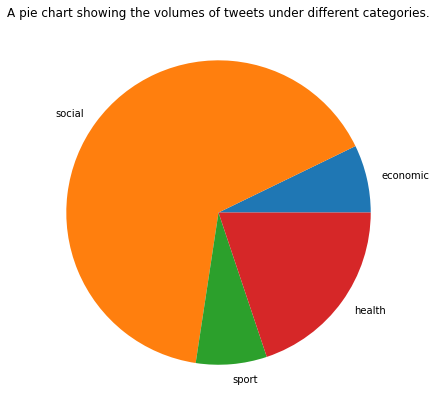

In [57]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

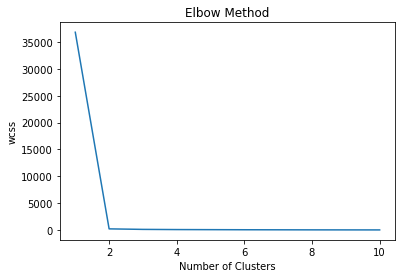

In [58]:
X = new_groups_df[['economic' , 'social',  'sport' , 'health']].values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


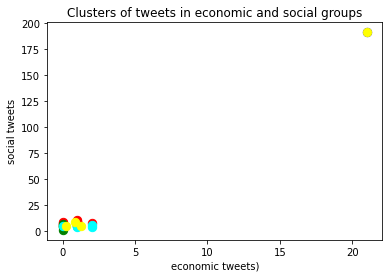

In [60]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=70, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=70, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=70, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=70, c='cyan', label ='Cluster 4') 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='yellow', label = 'Centroids')
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets)')
plt.ylabel('social tweets')
plt.show()

In [27]:
pip list

Package                            VersionNote: you may need to restart the kernel to use updated packages.
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2

anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2.0
beautifuls

referance:https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7